In [32]:
#!pip install nbconvert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp

In [35]:
data = pd.read_csv('Yulu_bike_sharing.csv')
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Problem: Perform EDA on the dataset and check the feature significance in terms of bicycle renting.
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [5]:
data.shape

(10886, 12)

In [6]:
data.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [7]:
len(data['datetime'])

10886

In [33]:
from pandas_profiling import ProfileReport

ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# From above we can seee that count of each feature is 10886 and It infers that there are no missing value.
# Here we have many categorical feture but It's already encoded in nuumerical formats so we don't need to perform 
# Label, Target, One-hot etc encodings

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season'>

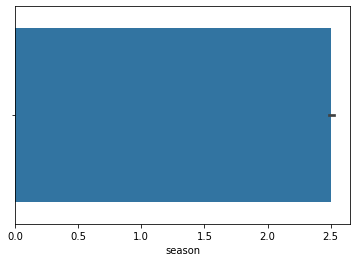

In [39]:
#Univariate analysis
sns.barplot(data['season'], data = data)
# From here we can infer that there are almost same no of data available for each season.

In [41]:
data[data['season']==1]

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
6780  2012-03-19 19:00:00       1        0           1        1  25.42   
6781  2012-03-19 20:00:00       1        0           1        1  24.60   
6782  2012-03-19 21:00:00       1        0           1        1  24.60   
6783  2012-03-19 22:00:00       1        0           1        2  22.96   
6784  2012-03-19 23:00:00       1        0           1        2  22.96   

       atemp  humidity  windspeed  casual  registered  count  
0     14.395        81     0.0000       3          13     16  
1     13.635        80     0.0000       8          32     40  
2     13.635        80     0.0000       5          27     32  
3     14.395        75     0.0000       3          10     13  
4     14.395        75     0.0000       0           1      1  
...      ...       ...        ...     ...         ...    ...  
6780  30.305        61    15.0013      86         463    549  
6781  30.305        64    15.0013      34         296    330  
6782  30.305        64    11.0014      33         190    223  
6783  26.515        73    11.0014      17         131    148  
6784  26.515        78     8.9981       9          45     54  

[2686 rows x 12 columns]

<AxesSubplot:xlabel='temp', ylabel='count'>

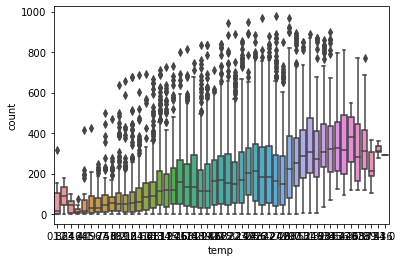

In [44]:
sns.boxplot(x = data['temp'], y = data['count'], data=data)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

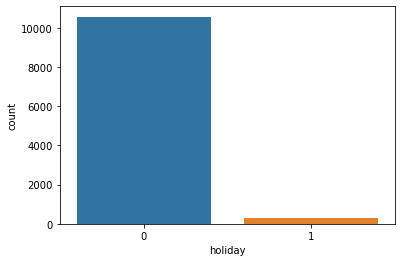

In [11]:
sns.countplot('holiday', data = data)
# From this plot, we can infer that there are lots of cycle rented on not holiday.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

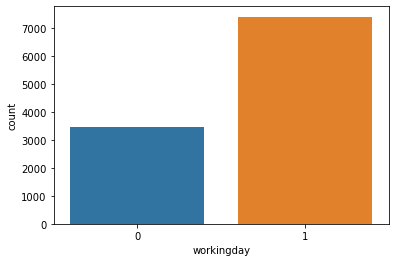

In [12]:
sns.countplot('workingday', data = data)
# From this plot we can infer that almost double cycle rented on working day.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

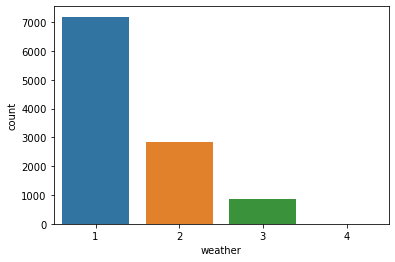

In [13]:
sns.countplot('weather', data = data)
# From here, we can infer that almost no cycle rented on rainy weather and most of the rented on (Clear, Few clouds, partly cloudy, partly cloudy) weather

<AxesSubplot:xlabel='workingday', ylabel='count'>

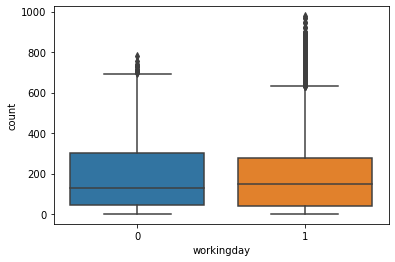

In [14]:
#Bi-variate analysis
sns.boxplot(x='workingday', y='count', data = data)

In [15]:
# From above boxplot, we can infer that there are some outliers in upper region in our data. 
# For finding outliers using boxplot, assuming the data will outlier if It will greater than Q3+1.5*IQR
# Below "outliers" function will print the number of outliers for corresponding working/non-working day

In [16]:
def outliers(workingday):
    Q1 = np.percentile(data[data['workingday']==workingday][['workingday', 'count']], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data[data['workingday']==workingday][['workingday', 'count']], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(data[data['workingday']==workingday][['workingday', 'count']], 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    #print(Q1, Q2, Q3, IQR)
    ul = Q3+(1.5*IQR)
    return len(data[data['workingday']==workingday][data['count']>ul])

for i in range(2):
    x = outliers(i)
    print(f"No of outliers for workingday {i} is: {x}")

No of outliers for workingday 0 is: 807
No of outliers for workingday 1 is: 1078


<ipython-input-16-53f61b134f9c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['workingday']==workingday][data['count']>ul])
<ipython-input-16-53f61b134f9c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['workingday']==workingday][data['count']>ul])


<AxesSubplot:xlabel='season', ylabel='count'>

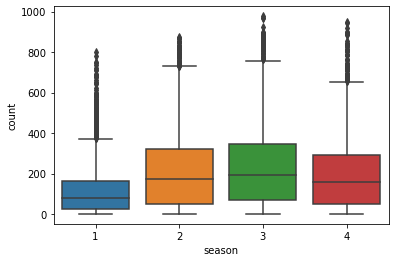

In [17]:
sns.boxplot(x='season', y='count', data = data)

In [18]:
# From above boxplot, we can infer that there are some outliers in upper region in our data. 
# For finding outliers using boxplot, assuming the data will outlier if It will greater than Q3+1.5*IQR
# Below "outliers" function will print the number of outliers for each season

In [19]:
def outliers(season):
    Q1 = np.percentile(data[data['season']==season][['season', 'count']], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data[data['season']==season][['season', 'count']], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(data[data['season']==season][['season', 'count']], 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    #print(Q1, Q2, Q3, IQR)
    ul = Q3+(1.5*IQR)
    return len(data[data['season']==season][data['count']>ul])

for i in range(1,5):
    x = outliers(i)
    print(f"No of outliers for season {i} is: {x}")

No of outliers for season 1 is: 533
No of outliers for season 2 is: 399
No of outliers for season 3 is: 322
No of outliers for season 4 is: 380


<ipython-input-19-67498eac5582>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['season']==season][data['count']>ul])
<ipython-input-19-67498eac5582>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['season']==season][data['count']>ul])
<ipython-input-19-67498eac5582>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['season']==season][data['count']>ul])
<ipython-input-19-67498eac5582>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['season']==season][data['count']>ul])


<AxesSubplot:xlabel='weather', ylabel='count'>

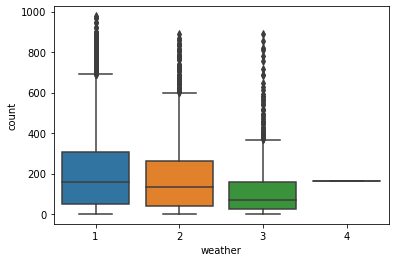

In [20]:
sns.boxplot(x= 'weather', y = 'count', data = data)

In [21]:
# From above boxplot, we can infer that there are some outliers in upper region in our data. 
# For finding outliers using boxplot, assuming the data will outlier if It will greater than Q3+1.5*IQR
# Below "outliers" function will print the number of outliers for each weather

In [22]:
def outliers(weather):
    Q1 = np.percentile(data[data['weather']==weather][['weather', 'count']], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data[data['weather']==weather][['weather', 'count']], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(data[data['weather']==weather][['weather', 'count']], 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    #print(Q1, Q2, Q3, IQR)
    ul = Q3+(1.5*IQR)
    return len(data[data['weather']==weather][data['count']>ul])

for i in range(1,4):
    x = outliers(i)
    print(f"No of outliers for weather {i} is: {x}")

No of outliers for weather 1 is: 1095
No of outliers for weather 2 is: 467
No of outliers for weather 3 is: 188


<ipython-input-22-0526cd81297b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['weather']==weather][data['count']>ul])
<ipython-input-22-0526cd81297b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['weather']==weather][data['count']>ul])
<ipython-input-22-0526cd81297b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(data[data['weather']==weather][data['count']>ul])


In [23]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [24]:
# To check working Day has an effect on the number of electric cycles rented or not
# H0 - Working Day (both 0 and 1 i.e working and not working day) has same effect on the count of cycles rented
# H1 - Both working and not Working Day has not same effect on the count of cycles rented
# Using 2 sample T-Test

print(np.mean(data[data['workingday']==1]['count']))
print(np.mean(data[data['workingday']==0]['count']))

193.01187263896384
188.50662061024755


In [25]:
stats, p_val = ttest_ind(data['workingday'], data['count'])
print(stats, p_val)

-109.95076974934595 0.0


In [26]:
# As p-val is very less than alpha (assuming .05 here), so we can reject the null hypothesis.
# So Working Day and not working day has not same effect on cycles rented

In [27]:
# To check if No. of cycles rented is similar or different in different weather 
# ANNOVA for weather of 4 groups
# HO: The mean of all 4 groups will be same
# H1: The mean of all 4 groups won't be same

from scipy.stats import f_oneway
gp1 = data[data['weather']==1]['count']
gp2 = data[data['weather']==2]['count']
gp3 = data[data['weather']==3]['count']
gp4 = data[data['weather']==4]['count']
f_oneway(gp1, gp2, gp3, gp4)

# Result:
# As p value is very very less, we can reject the null hypothesis.
# So we can say the no of cycles rented is different in different weather.


F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [28]:
# To check if No. of cycles rented is similar or different in different season
# ANNOVA for season of 4 groups
# HO: The mean of all 4 groups will be same
# H1: The mean of all 4 groups won't be same

from scipy.stats import f_oneway
gp1 = data[data['season']==1]['count']
gp2 = data[data['season']==2]['count']
gp3 = data[data['season']==3]['count']
gp4 = data[data['season']==4]['count']
f_oneway(gp1, gp2, gp3, gp4)

# Result:
# As p value is very very less, we can reject the null hypothesis.
# So we can say the no of cycles rented is different in different season.


F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [29]:
# To check if Weather is dependent on the season
# Chi-square test
# H0: "season" and "weather" are independent feature.
# H1: "season" and "weather" are not independent feature.

from scipy.stats import chi2_contingency

x = pd.crosstab(data.season, data.weather, margins = False)
x.columns = ['w1', 'w2', 'w3', 'w4']
x.index = ['s1', 's2', 's3', 's4']
print(x)
stat, p, dof, expected = chi2_contingency(x)
print(f"chi_stat: {stat}, p-value: {p}")

#As p value is very very less (assuming alpha = 0.05) than alpha so null hypothesis can be rejected.
# We can say that "season" and "weather" are not independent feature.

      w1   w2   w3  w4
s1  1759  715  211   1
s2  1801  708  224   0
s3  1930  604  199   0
s4  1702  807  225   0
chi_stat: 49.158655596893624, p-value: 1.549925073686492e-07
